Introduction and Decomposing 

In [ ]:
# Import Library @@GauravLute@@
import pandas as pd
import numpy as np 
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt 

In [4]:
series = [i+ randrange(10) for i in range(1, 100)]

In [6]:
series

[2,
 9,
 7,
 5,
 5,
 15,
 15,
 11,
 13,
 12,
 11,
 17,
 14,
 20,
 23,
 24,
 24,
 21,
 25,
 28,
 28,
 31,
 24,
 29,
 30,
 29,
 35,
 34,
 35,
 32,
 36,
 38,
 35,
 42,
 41,
 40,
 43,
 39,
 39,
 44,
 47,
 50,
 51,
 46,
 47,
 50,
 51,
 49,
 51,
 53,
 58,
 52,
 54,
 58,
 64,
 63,
 60,
 67,
 63,
 62,
 64,
 70,
 70,
 66,
 73,
 69,
 73,
 73,
 75,
 74,
 79,
 72,
 73,
 79,
 82,
 83,
 85,
 79,
 87,
 86,
 86,
 86,
 90,
 84,
 91,
 90,
 88,
 94,
 92,
 90,
 91,
 94,
 100,
 96,
 96,
 97,
 103,
 107,
 105]

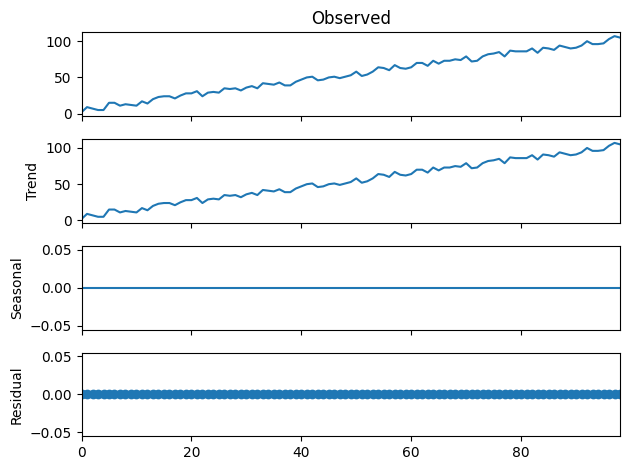

In [9]:
result = seasonal_decompose(series, model= 'additive', period=1)
result.plot()
plt.show()

In [10]:
# Multiplicative

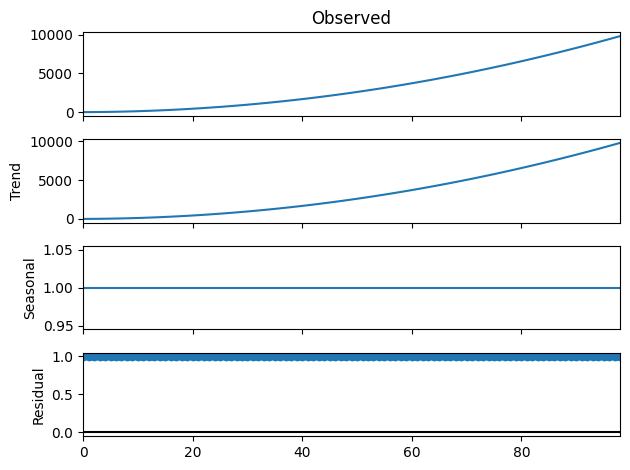

In [14]:
series_2 = [i**2.0 for i in range(1, 100)]
result_2 = seasonal_decompose(series_2, model='multiplicative', period=1)
result_2.plot()
plt.show()

In [ ]:
# Example

In [26]:
df = pd.read_csv('airline-passengers_data.csv')
df.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


<Axes: xlabel='Month'>

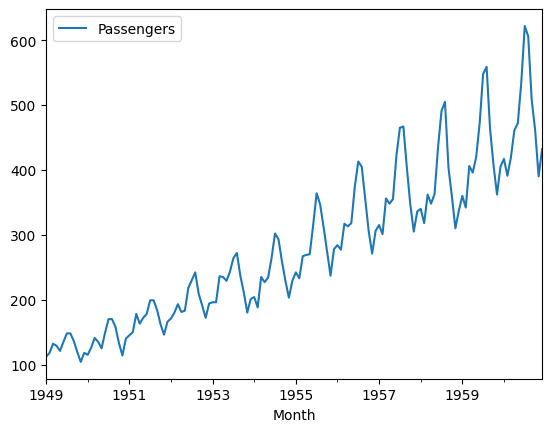

In [27]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()

In [ ]:
result_air = seasonal_decompose(df['Passengers'], model='additive', period=12)


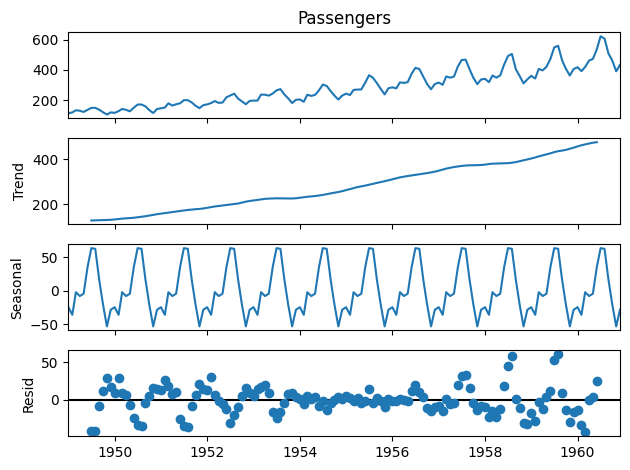

In [32]:
result_air.plot()
plt.show()

<Axes: xlabel='Month'>

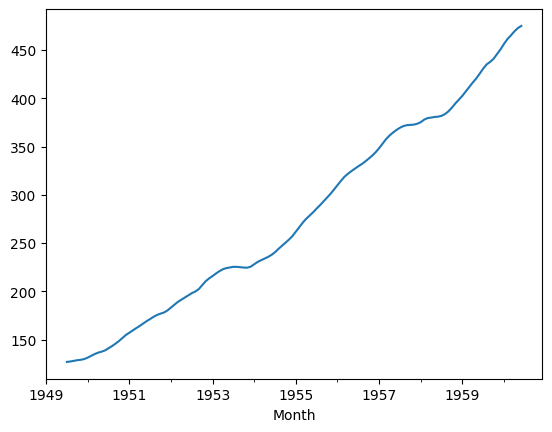

In [33]:
result_air.trend.plot()

<Axes: xlabel='Month'>

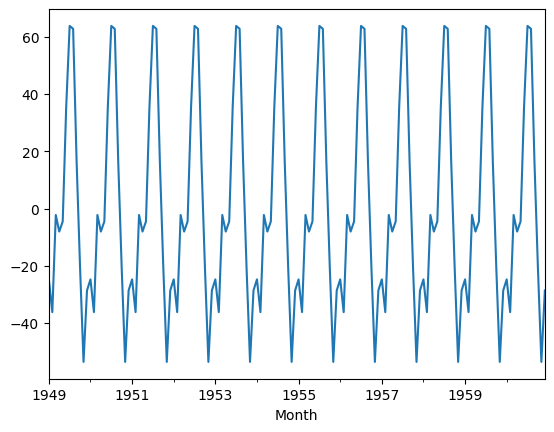

In [34]:
result_air.seasonal.plot()

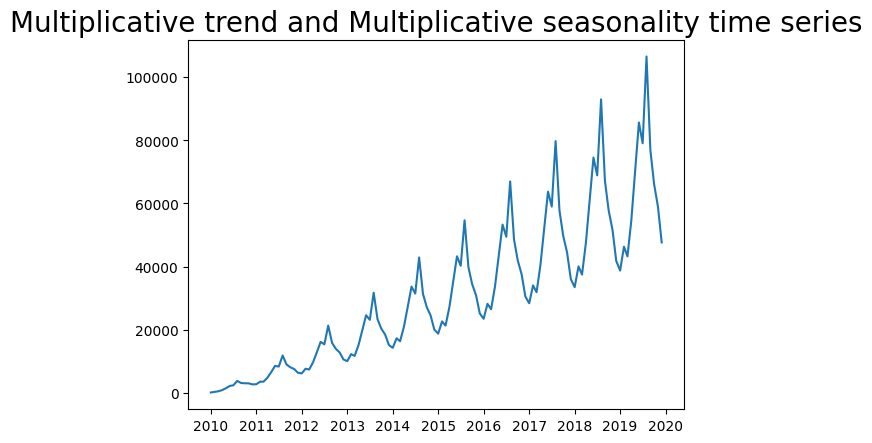

In [35]:
# Single season multiplier factors - for seasonality effect
xs = np.arange(1, 121)
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

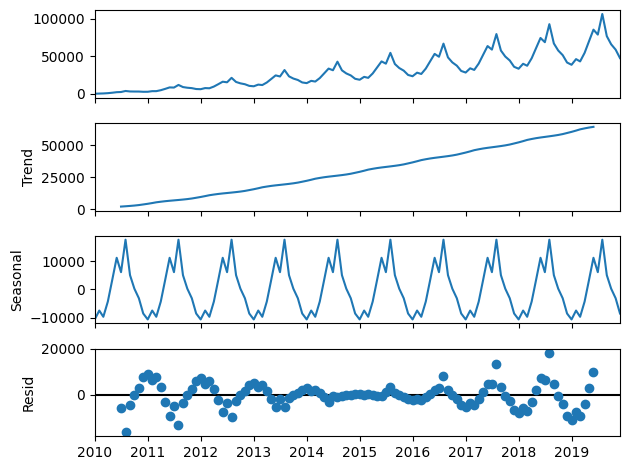

In [36]:
decomposed = seasonal_decompose(df_mm, model='additive')
decomposed.plot();

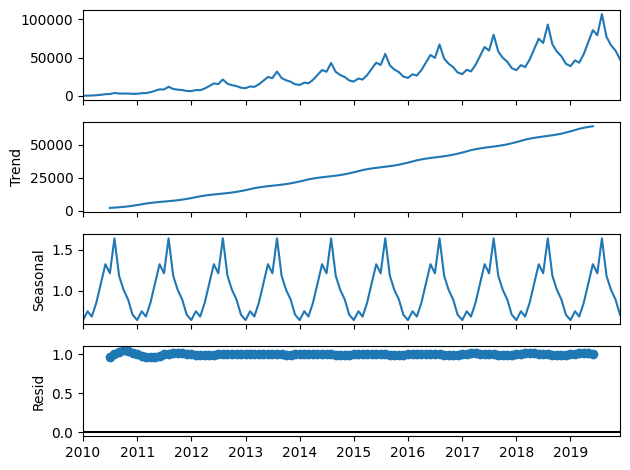

In [37]:
decomposed = seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();

In [ ]:
##################